In [1]:
!pip install torch transformers datasets peft accelerate bitsandbytes



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 77.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 58.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 39.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
from huggingface_hub import login
login("hf_XXXXXX") # replace with your own token


In [3]:
from transformers import AutoTokenizer, AutoModelForCausalLM

model_name = "google/gemma-2b"  # or "google/gemma-7b"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    device_map="auto",  # auto place on GPU
    load_in_4bit=True,  # needs bitsandbytes
    trust_remote_code=True
)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/33.6k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.24M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/627 [00:00<?, ?B/s]

The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


model.safetensors.index.json:   0%|          | 0.00/13.5k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/67.1M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

In [7]:
from google.colab import files
uploaded = files.upload()


Saving Complete_1000_Prompt_Dataset__Structured_Types_.csv to Complete_1000_Prompt_Dataset__Structured_Types_.csv
Saving Final_Low-Effort_Queries__Conditional_Filters_Only_.csv to Final_Low-Effort_Queries__Conditional_Filters_Only_.csv
Saving Final_Unique_Low-Effort_Actor-Location_Queries.csv to Final_Unique_Low-Effort_Actor-Location_Queries.csv
Saving Strict_Metadata_Filtered_1000_Prompt_Dataset.csv to Strict_Metadata_Filtered_1000_Prompt_Dataset.csv
Saving Strict_Year_Theme_Prompts__Only_Mentioned_Metadata_.csv to Strict_Year_Theme_Prompts__Only_Mentioned_Metadata_.csv


In [9]:
# Step 2: Combine them
import pandas as pd
import io


In [10]:
dataframes = []
for filename in uploaded:
    df = pd.read_csv(io.BytesIO(uploaded[filename]))
    df = df[["user_prompt", "response"]]  # Ensure only required columns
    dataframes.append(df)

combined_df = pd.concat(dataframes, ignore_index=True)

In [11]:
# Step 3: Save as JSONL
jsonl_path = "combined_movie_dataset.jsonl"
combined_df.to_json(jsonl_path, orient="records", lines=True)


In [12]:
from datasets import load_dataset

In [13]:

dataset = load_dataset("json", data_files={"train": "combined_movie_dataset.jsonl"})["train"]


Generating train split: 0 examples [00:00, ? examples/s]

In [14]:
system_instruction = (
    "If the user asks something other than movies, promptly ask the user to rephrase the question and ask for movie recommendations.\n"
    "You are an assistant that takes a movie-related user prompt and extracts:\n"
    "1. A positive_query: A string with words related to what the user wants (actors, places, themes, plots, etc.). Do not mention actual movies and do not leave it empty.\n"
    "2. A negative_query: A string describing actors or themes the user wants to avoid.\n"
    "3. A row_checker object that may include any of the following optional filters (do not put too many restrictions, only what user asked for):\n"
    "   - min_year (integer)\n"
    "   - max_year (integer)\n"
    "   - min_rating (float)\n"
    "   - max_rating (float)\n"
    "   - min_duration (integer, in minutes)\n"
    "   - max_duration (integer, in minutes)\n"
    "   - required_genres (list of strings)\n"
    "   - excluded_genres (list of strings)\n"
    "   - required_languages (list of strings)\n"
    "   - excluded_languages (list of strings)\n"
    "If the prompt is asking for movie recommendations, return ONLY a valid JSON object with keys: positive_query, negative_query, and row_checker."
)

def format_with_system_instruction(example):
    return {
        "prompt": f"{system_instruction}\n\n### User:\n{example['user_prompt'].strip()}\n\n### Assistant:",
        "output": example["response"].strip()
    }

tokenised_dataset = dataset.map(format_with_system_instruction)


Map:   0%|          | 0/3000 [00:00<?, ? examples/s]

In [15]:
def tokenize(example):
    full_input = example["prompt"] + " " + example["output"]
    tokens = tokenizer(
        full_input,
        truncation=True,
        padding="max_length",
        max_length=512
    )
    tokens["labels"] = tokens["input_ids"].copy()
    return tokens

extra_tokenized_dataset = tokenised_dataset.map(tokenize, remove_columns=dataset.column_names)


Map:   0%|          | 0/3000 [00:00<?, ? examples/s]

In [16]:
from peft import get_peft_model, LoraConfig, TaskType

peft_config = LoraConfig(
    r=8,
    lora_alpha=32,
    target_modules=["q_proj", "v_proj"],
    lora_dropout=0.1,
    task_type=TaskType.CAUSAL_LM
)

model = get_peft_model(model, peft_config)


In [18]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir="./gemma-movie-extractor",
    per_device_train_batch_size=2,
    num_train_epochs=3,
    logging_dir="./logs",
    save_steps=100,
    logging_steps=10,
    fp16=True
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=extra_tokenized_dataset
)

trainer.train()


No label_names provided for model class `PeftModelForCausalLM`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: rohan10dalvi (rohan10dalvi-northeastern-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


/usr/local/lib/python3.11/dist-packages/bitsandbytes/nn/modules.py:451: UserWarning: Input type into Linear4bit is torch.float16, but bnb_4bit_compute_dtype=torch.float32 (default). This will lead to slow inference or training speed.
  warnings.warn(


Step,Training Loss
10,9.569200
20,6.532600
30,5.924900
40,5.494400
50,4.777700
60,4.766600
70,4.110400
80,3.887300
90,3.701700
100,3.284400


TrainOutput(global_step=4500, training_loss=1.751536876042684, metrics={'train_runtime': 4105.9619, 'train_samples_per_second': 2.192, 'train_steps_per_second': 1.096, 'total_flos': 5.4820620730368e+16, 'train_loss': 1.751536876042684, 'epoch': 3.0})

In [19]:
model.save_pretrained("gemma2-finetuned")
tokenizer.save_pretrained("gemma2-finetuned")


('gemma2-finetuned/tokenizer_config.json',
 'gemma2-finetuned/special_tokens_map.json',
 'gemma2-finetuned/tokenizer.model',
 'gemma2-finetuned/added_tokens.json',
 'gemma2-finetuned/tokenizer.json')

In [20]:
!zip -r gemma2-finetuned.zip gemma2-finetuned


  adding: gemma2-finetuned/ (stored 0%)
  adding: gemma2-finetuned/README.md (deflated 66%)
  adding: gemma2-finetuned/tokenizer_config.json (deflated 96%)
  adding: gemma2-finetuned/special_tokens_map.json (deflated 76%)
  adding: gemma2-finetuned/adapter_config.json (deflated 54%)
  adding: gemma2-finetuned/tokenizer.json (deflated 84%)
  adding: gemma2-finetuned/adapter_model.safetensors (deflated 8%)
  adding: gemma2-finetuned/tokenizer.model (deflated 51%)


In [21]:
from google.colab import files
files.download("gemma2-finetuned.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
!ls gemma2-finetuned


adapter_config.json	   special_tokens_map.json  tokenizer.model
adapter_model.safetensors  tokenizer_config.json
README.md		   tokenizer.json


In [24]:
def count_parameters(model):
    total = sum(p.numel() for p in model.parameters())
    trainable = sum(p.numel() for p in model.parameters() if p.requires_grad)
    return total, trainable

total, trainable = count_parameters(model)
print(f"Total Parameters: {total:,}")
print(f"Trainable Parameters: {trainable:,}")
print(f"Trainable %: {100 * trainable / total:.2f}%")


Total Parameters: 1,516,189,696
Trainable Parameters: 921,600
Trainable %: 0.06%


In [29]:
from torch.utils.data import DataLoader
import torch, math

# Dataset is already tokenized; just use input_ids, attention_mask, labels
def filter_columns(example):
    return {
        "input_ids": example["input_ids"],
        "attention_mask": example["attention_mask"],
        "labels": example["labels"]
    }

eval_dataset = extra_tokenized_dataset.map(filter_columns, remove_columns=["prompt", "output"])
loader = DataLoader(eval_dataset, batch_size=2)

model.eval()
total_loss = 0
steps = 0

for batch in loader:
    # Safely convert and stack tensor lists
    batch = {k: torch.stack([torch.tensor(i) for i in v]).to(model.device) for k, v in batch.items()}
    with torch.no_grad():
        loss = model(**batch).loss
        total_loss += loss.item()
        steps += 1

avg_loss = total_loss / steps
perplexity = math.exp(avg_loss)

print(f"✅ Average Loss: {avg_loss:.4f}")
print(f"📉 Perplexity: {perplexity:.2f}")


<ipython-input-29-301c42b84d30>:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  batch = {k: torch.stack([torch.tensor(i) for i in v]).to(model.device) for k, v in batch.items()}


✅ Average Loss: 18.1927
📉 Perplexity: 79611896.96


In [30]:
from transformers import pipeline

generator = pipeline("text-generation", model=model, tokenizer=tokenizer, device_map="auto")

prompt = "What movies has funny people suggest me "
result = generator(prompt, max_new_tokens=100, temperature=0.7, do_sample=True)
print(result[0]["generated_text"])


Device set to use cuda:0
The model 'PeftModelForCausalLM' is not supported for text-generation. Supported models are ['AriaTextForCausalLM', 'BambaForCausalLM', 'BartForCausalLM', 'BertLMHeadModel', 'BertGenerationDecoder', 'BigBirdForCausalLM', 'BigBirdPegasusForCausalLM', 'BioGptForCausalLM', 'BlenderbotForCausalLM', 'BlenderbotSmallForCausalLM', 'BloomForCausalLM', 'CamembertForCausalLM', 'LlamaForCausalLM', 'CodeGenForCausalLM', 'CohereForCausalLM', 'Cohere2ForCausalLM', 'CpmAntForCausalLM', 'CTRLLMHeadModel', 'Data2VecTextForCausalLM', 'DbrxForCausalLM', 'DeepseekV3ForCausalLM', 'DiffLlamaForCausalLM', 'ElectraForCausalLM', 'Emu3ForCausalLM', 'ErnieForCausalLM', 'FalconForCausalLM', 'FalconMambaForCausalLM', 'FuyuForCausalLM', 'GemmaForCausalLM', 'Gemma2ForCausalLM', 'Gemma3ForConditionalGeneration', 'Gemma3ForCausalLM', 'GitForCausalLM', 'GlmForCausalLM', 'Glm4ForCausalLM', 'GotOcr2ForConditionalGeneration', 'GPT2LMHeadModel', 'GPT2LMHeadModel', 'GPTBigCodeForCausalLM', 'GPTNeoFo

What movies has funny people suggest me 2018, and why not.
 
How come i dont see the f888888888888888888888888888888888888888888888888888888888888888888888888888888888


In [31]:
correct = 0
total = 0

for batch in loader:
    batch = {k: torch.stack([torch.tensor(i) for i in v]).to(model.device) for k, v in batch.items()}
    with torch.no_grad():
        outputs = model(**batch)
        preds = outputs.logits.argmax(dim=-1)

    labels = batch["labels"]
    mask = labels != -100  # Ignore padding and masked positions
    correct += ((preds == labels) & mask).sum().item()
    total += mask.sum().item()

accuracy = correct / total
print(f"🎯 Token Accuracy: {accuracy:.4f}")


<ipython-input-31-96ad7e339e60>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  batch = {k: torch.stack([torch.tensor(i) for i in v]).to(model.device) for k, v in batch.items()}


🎯 Token Accuracy: 0.2130


<ipython-input-32-6bdfb2ca7366>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  batch = {k: torch.stack([torch.tensor(i) for i in v]).to(model.device) for k, v in batch.items()}


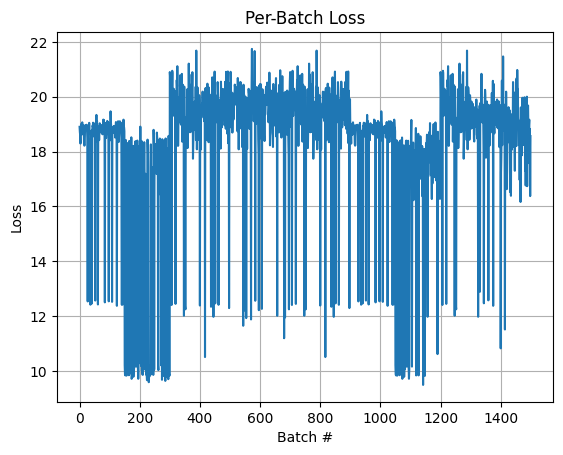

In [32]:
losses = []

for batch in loader:
    batch = {k: torch.stack([torch.tensor(i) for i in v]).to(model.device) for k, v in batch.items()}
    with torch.no_grad():
        loss = model(**batch).loss
    losses.append(loss.item())

import matplotlib.pyplot as plt
plt.plot(losses)
plt.title("Per-Batch Loss")
plt.xlabel("Batch #")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


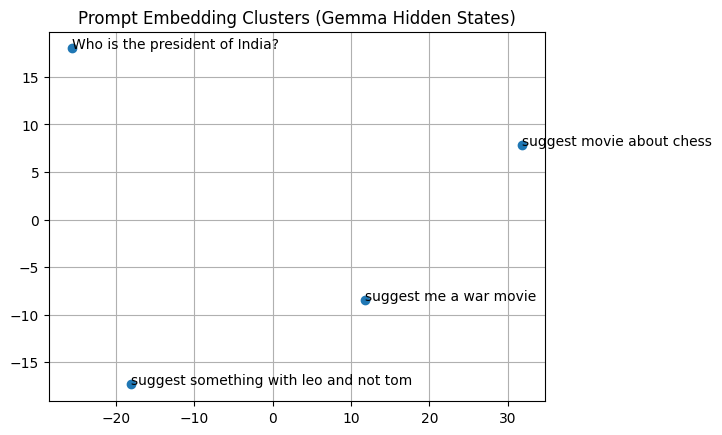

In [34]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

sample_prompts = ["suggest movie about chess", "suggest something with leo and not tom", "suggest me a war movie", "Who is the president of India?"]

# Tokenize with padding and truncation
inputs = tokenizer(sample_prompts, return_tensors="pt", padding=True, truncation=True, max_length=64).to(model.device)

# Enable hidden states output
model.config.output_hidden_states = True

with torch.no_grad():
    outputs = model(**inputs)
    # Get last layer's hidden state
    last_hidden = outputs.hidden_states[-1]  # shape: (batch, seq_len, hidden_dim)

# Reduce each prompt to a single vector (e.g., mean-pooling)
embeddings = last_hidden.mean(dim=1).cpu().numpy()

# Visualize using PCA
pca = PCA(n_components=2)
proj = pca.fit_transform(embeddings)

plt.scatter(proj[:, 0], proj[:, 1])
for i, txt in enumerate(sample_prompts):
    plt.annotate(txt, (proj[i, 0], proj[i, 1]))
plt.title("Prompt Embedding Clusters (Gemma Hidden States)")
plt.grid(True)
plt.show()


Saving Sampled_Prompts_by_Type.csv to Sampled_Prompts_by_Type.csv


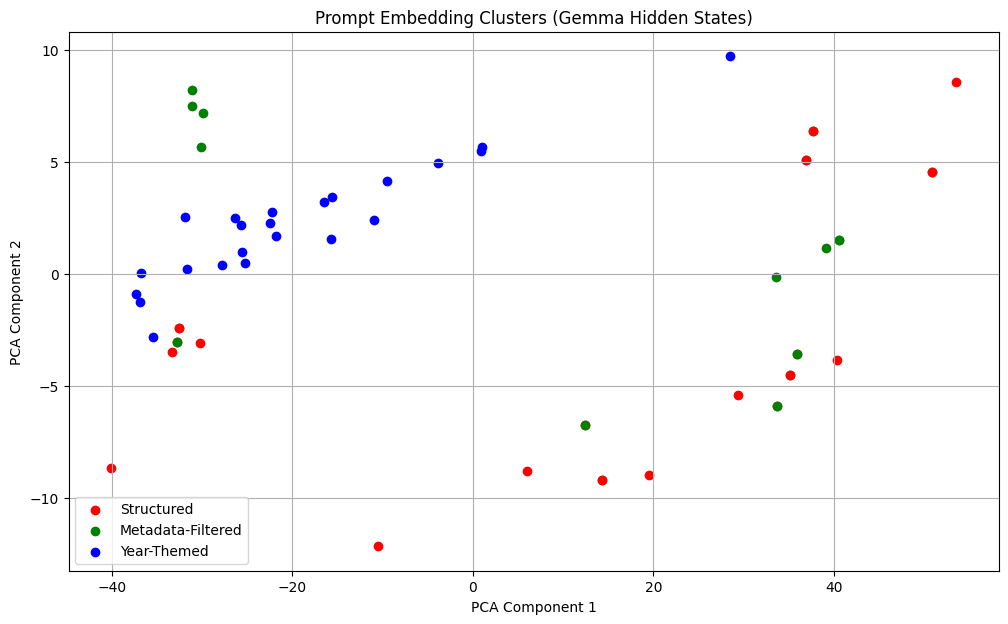

In [36]:
# STEP 1: Upload the file
from google.colab import files
uploaded = files.upload()  # Upload Sampled_Prompts_by_Type.csv

# STEP 3: Load and sample the CSV
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import torch

# Load uploaded file (assumes only one file was uploaded)
import io
filename = list(uploaded.keys())[0]
df = pd.read_csv(io.StringIO(uploaded[filename].decode('utf-8')))

# Sample subset (adjust n if GPU is limited)
subset_df = df.sample(n=60, random_state=42).reset_index(drop=True)

# STEP 4: Tokenize and move to GPU
prompts = subset_df["prompt"].tolist()
inputs = tokenizer(prompts, return_tensors="pt", padding=True, truncation=True, max_length=64).to(model.device)

# Enable hidden state outputs
model.config.output_hidden_states = True

with torch.no_grad():
    outputs = model(**inputs)
    last_hidden = outputs.hidden_states[-1]  # (batch_size, seq_len, hidden_dim)

# STEP 5: Mean pool and apply PCA
embeddings = last_hidden.mean(dim=1).cpu().numpy()
pca = PCA(n_components=2)
proj = pca.fit_transform(embeddings)

# STEP 6: Plot
colors = {"Structured": "red", "Year-Themed": "blue", "Metadata-Filtered": "green"}
plt.figure(figsize=(12, 7))
for i, prompt_type in enumerate(subset_df["type"]):
    plt.scatter(proj[i, 0], proj[i, 1], color=colors[prompt_type], label=prompt_type if prompt_type not in plt.gca().get_legend_handles_labels()[1] else "")

plt.title("Prompt Embedding Clusters (Gemma Hidden States)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()
